# Plotting procedures
This file is made for visualizing the results. It uses Json objects to communicate with other notebokes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import json

# fix what is missing with the datetime/time/calendar package
def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = int(sourcedate.year + month / 12 )
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year, month)[1])
    return datetime.date(year,month,day)

print('last run of this notebook:')
the_time_is_now = time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime())
print(the_time_is_now)

#saving plots
save_figures=False

last run of this notebook:
Wed, 07 Feb 2018 18:29:21


In [2]:
# make initialization dictionary
# reading excel data (back)
input_file = 'init_buyers_sellers_lng.xlsx'
df_buyer = pd.read_excel(input_file, orient='index',sheetname='buyers')
df_seller = pd.read_excel(input_file, orient='index',sheetname='sellers')
df_buyer['market'] = [eval(i) for i in df_buyer['market'].values]
df_seller['market'] = [eval(i) for i in df_seller['market'].values]
init_buyer = df_buyer.to_dict('index')
init_seller = df_seller.to_dict('index')

# getting all unique markets
market = []
for i in init_seller:
    for x in init_seller[i]['market']: market.append(x)
for i in init_buyer:
    for x in init_buyer[i]['market']: market.append(x)
market = list(set(market))
init_market = market

# Reading data back
with open('marketdata.json', 'r') as f:
     run_market = json.load(f)
        
# Reading data back
with open('sellerdata.json', 'r') as f:
     run_seller = json.load(f)# Show some real consumption data, for more data see folder data analytics
        
# Reading data back
with open('buyerdata.json', 'r') as f:
     run_buyer = json.load(f)
        
# Reading data back
df_pickle = pd.read_pickle('marketdataorigin.pickle', compression='infer')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


## Scenarios & CBS data

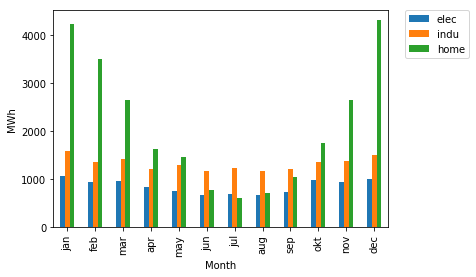

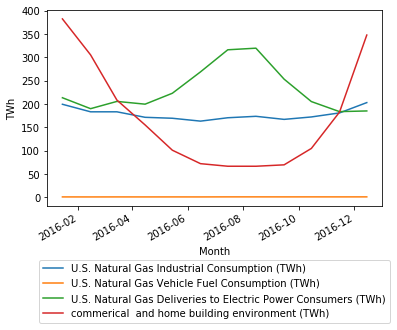

In [3]:
# Show some real consumption data, for more data see folder data analytics
#read montly consumption data of 2010 into a dataframe
df = pd.read_csv('2010cbstestrun.csv', header=0, index_col=0)
df = df.transpose()

#plot the 2010 monthly consumption data
df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('MWh')
plt.xlabel('Month')
if save_figures:
    filepath = 'plots/cbs_data.png'
    plt.savefig(filepath, bbox_inches='tight')
plt.show();

df = pd.read_excel('US_monthly_inputdata.xlsx', header=[0,1], index_col=0)
#print(df.index)
df.index = pd.to_datetime(df.index)
header_list = list(df['TWh'].columns.values)
df['TWh'][header_list[-4:]].plot()
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.25), ncol=1)
plt.ylabel('TWh')
plt.xlabel('Month')
if save_figures:
    filepath = 'plots/us_data.png'
    plt.savefig(filepath, bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


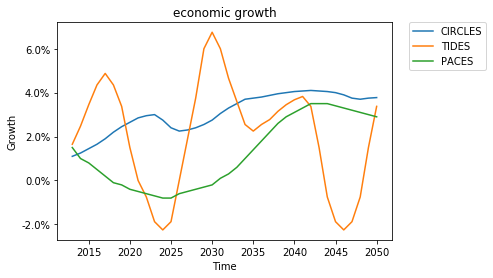

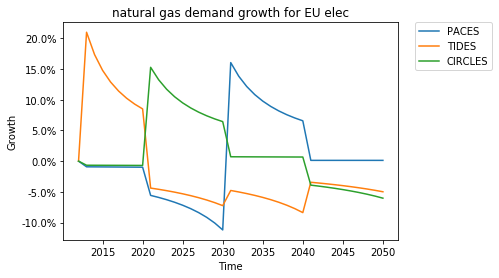

In [4]:
# import scenarios
inputfile = 'economic growth scenarios.xlsx'
economic_growth = pd.read_excel(inputfile, sheet='ec_growth', skiprows=0, index_col=0, header=[0,1])
economic_growth = economic_growth['ECONOMIC GROWTH'][['CIRCLES','TIDES','PACES']]

# demand for electricity import scenarios spaced by excel
elec_space = pd.read_excel(inputfile, sheetname='elec_space', index_col=0, header=[0,1])
elec_space = elec_space['RELATIVE']

# gasdemand home (percentage increases)
home_savings = {'PACES': 1.01, 'TIDES': .99, 'CIRCLES': .97}

ax = economic_growth.plot(title= 'economic growth')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
plt.ylabel('Growth')
plt.xlabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if save_figures:
    filepath = 'plots/EconGrowthScen.png'
    plt.savefig(filepath, bbox_inches='tight')
plt.show()

ax = elec_space.plot(title='natural gas demand growth for EU elec')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format((x-1)*100) for x in vals])
plt.ylabel('Growth')
plt.xlabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if save_figures:
    filepath = 'plots/ElecDemGrowthScen.png'
    plt.savefig(filepath, bbox_inches='tight')
plt.show()

## reserves
In 'reserves' we examine the 

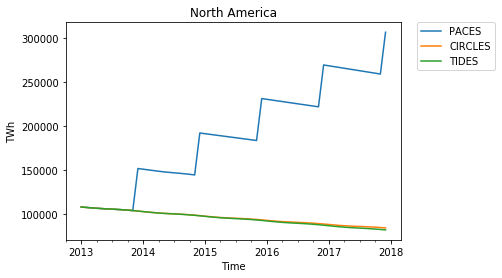

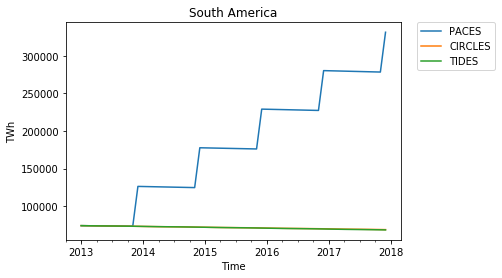

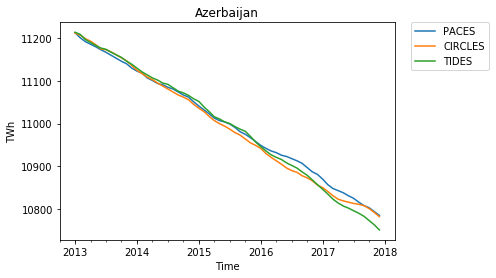

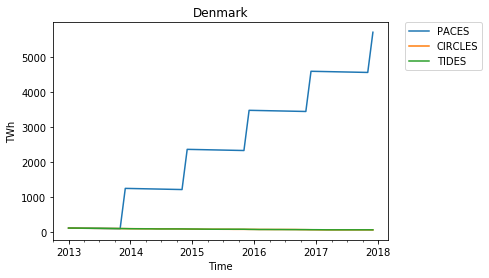

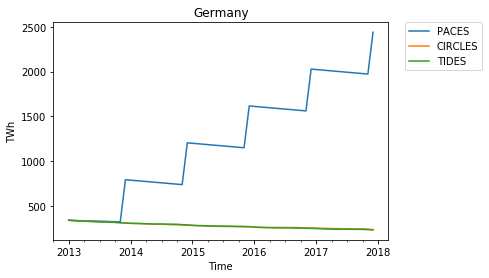

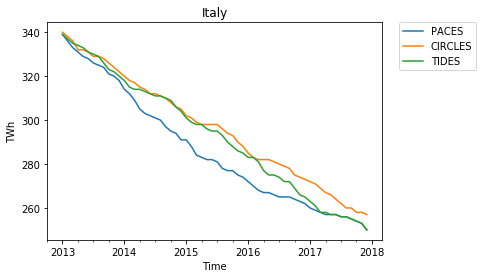

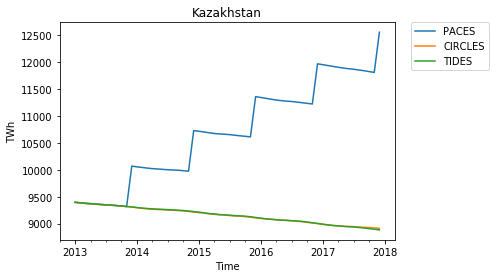

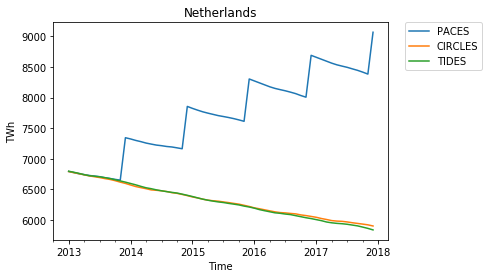

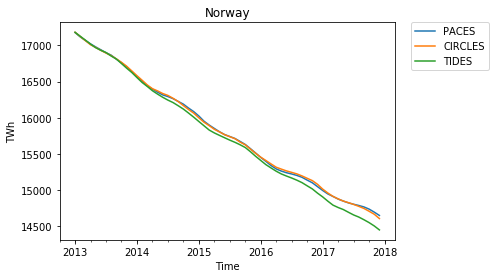

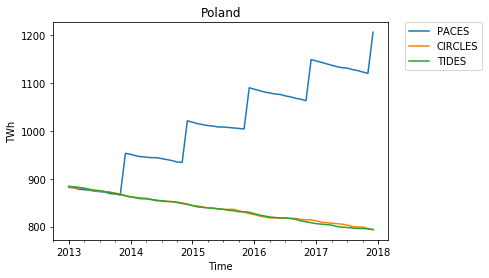

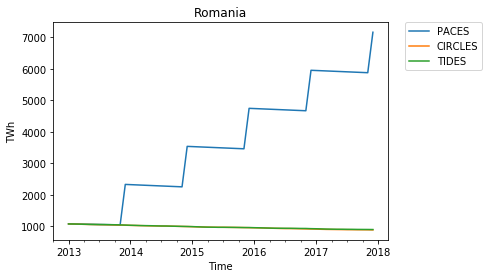

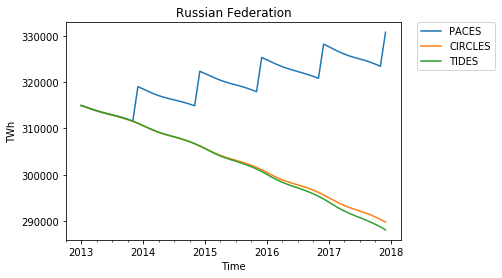

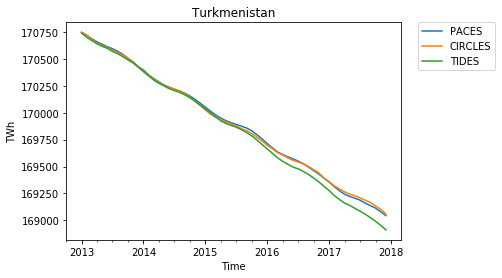

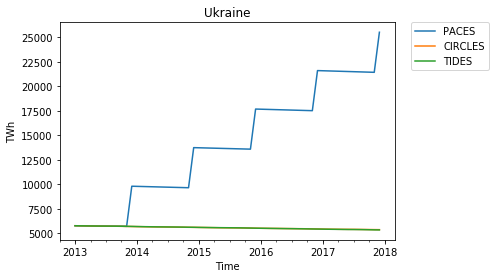

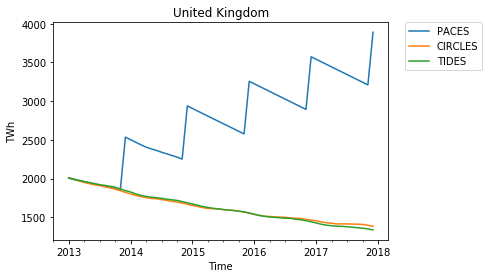

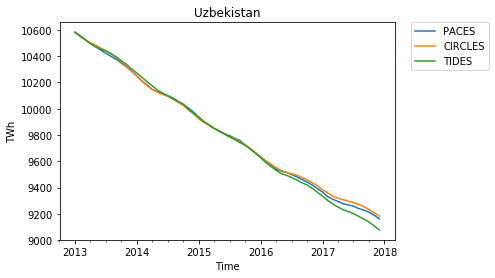

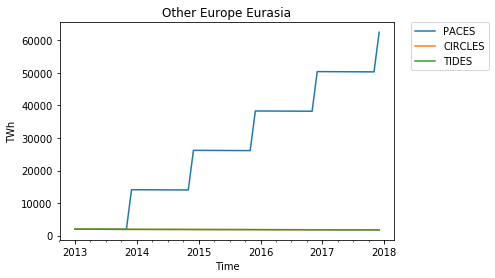

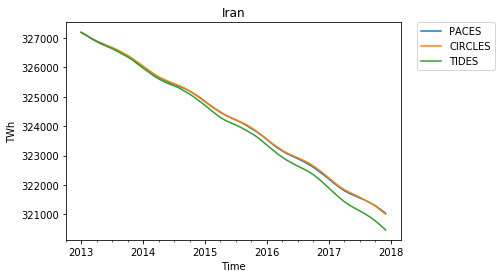

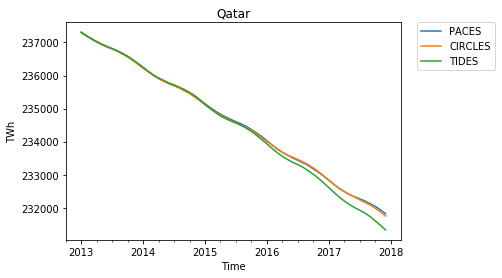

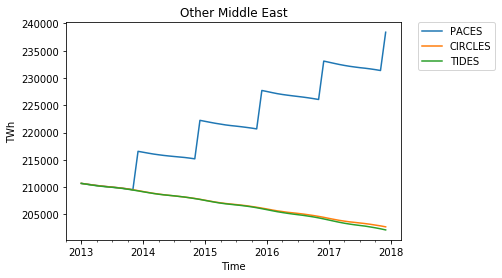

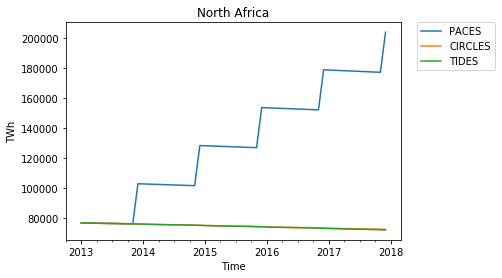

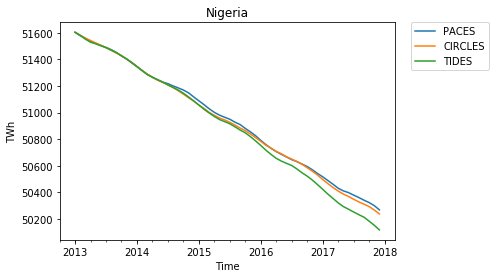

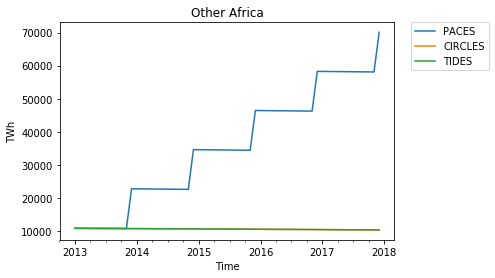

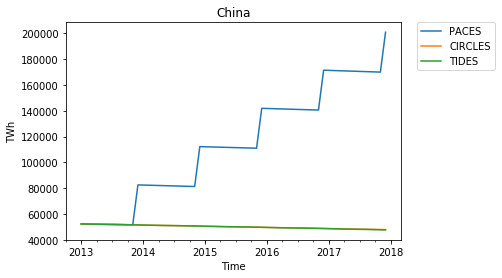

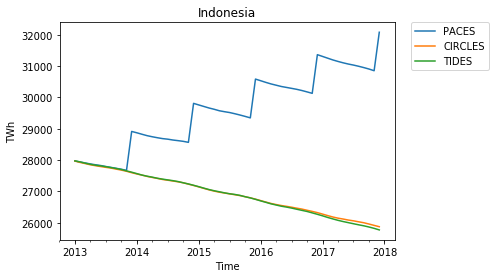

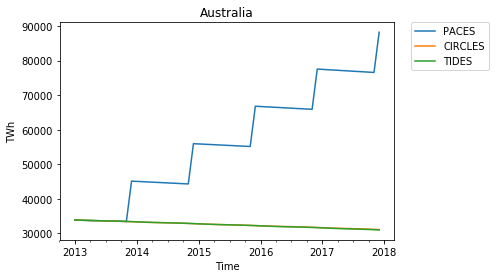

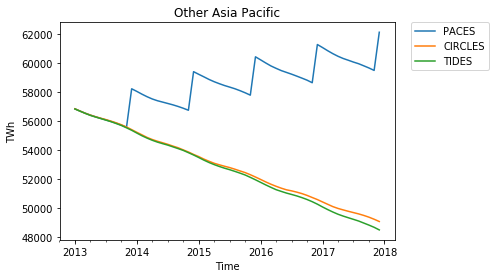

In [5]:
# Reserves
for reserve in init_seller:
    for scen in run_seller:
        df_res = pd.DataFrame(run_seller[scen])
        df_res = df_res[df_res[3]==reserve]
        df_res = df_res.set_index(0)
        df_res.index = pd.to_datetime(df_res.index)
        #for i in df_res.columns:
        df_res[1].plot(label="%s" % (scen), title=reserve)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/reserve_%s.png' %(reserve)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

## Prices

af


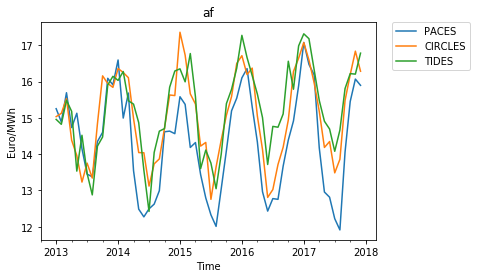

naf


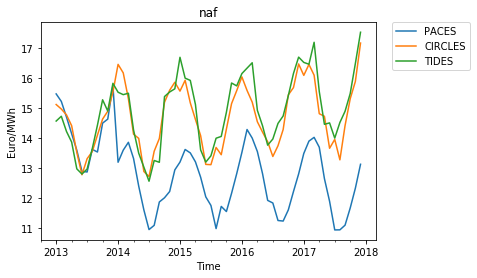

na


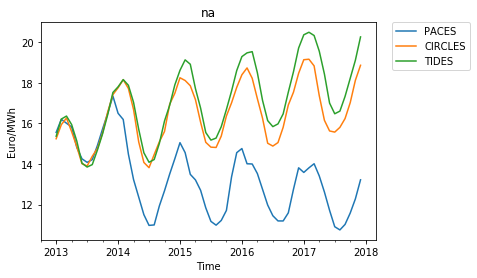

cn


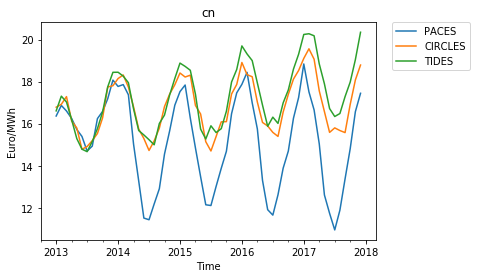

au


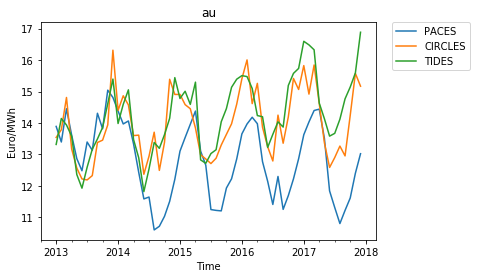

sa


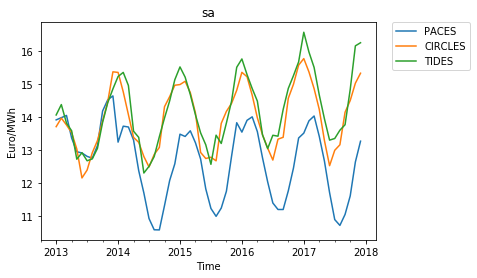

me


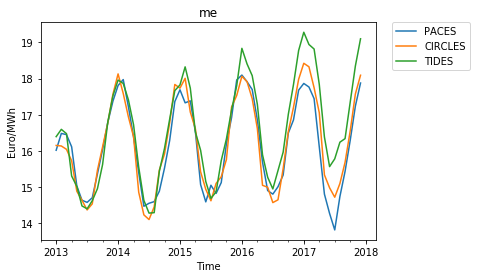

lng


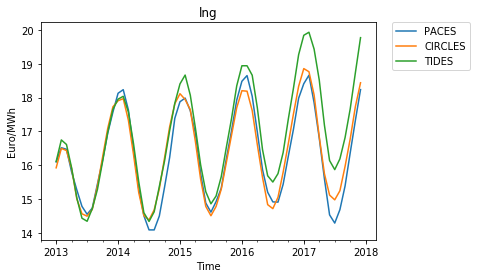

eu


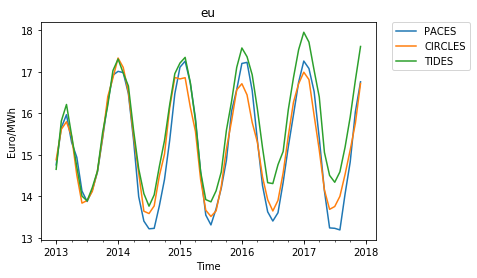

as


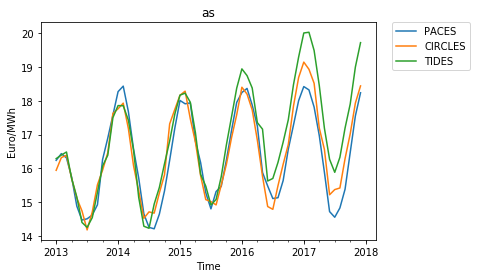

ru


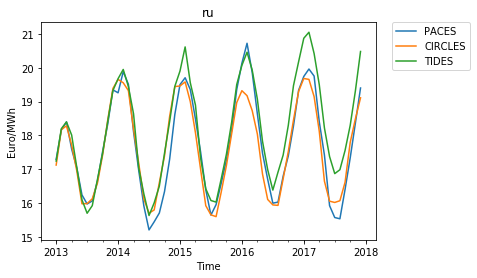

ir


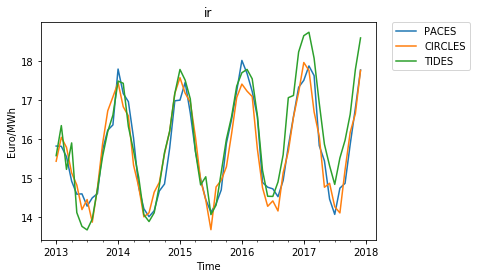

In [6]:
plt.subplots()
for market in init_market:
    print(market)
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df[1].plot(label=i, title=market)
    plt.ylabel('Euro/MWh')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/market_price_Monthly_%s.png' %(market)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

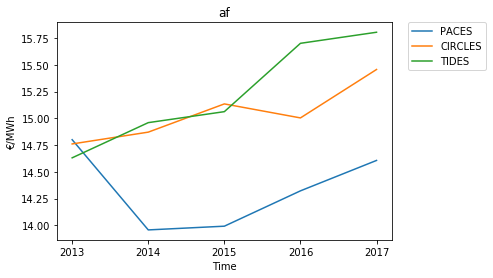

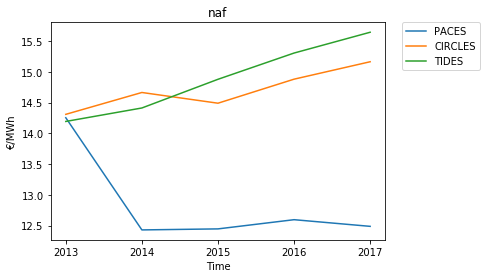

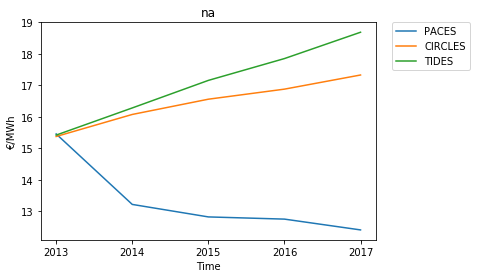

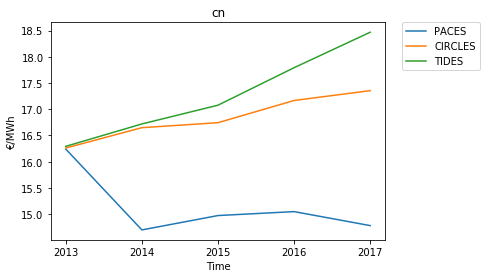

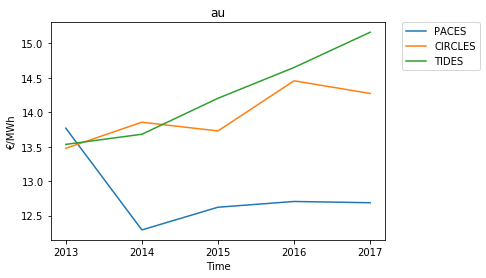

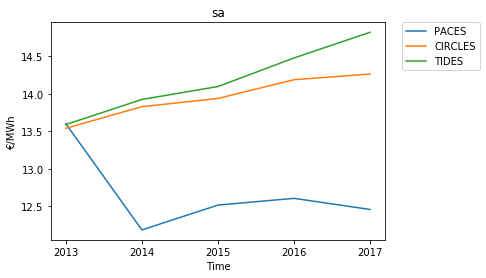

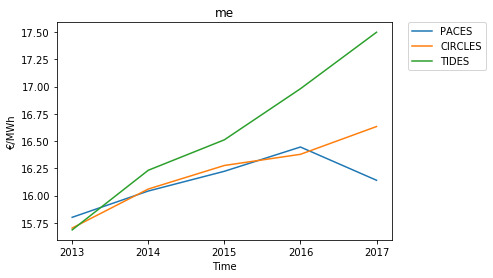

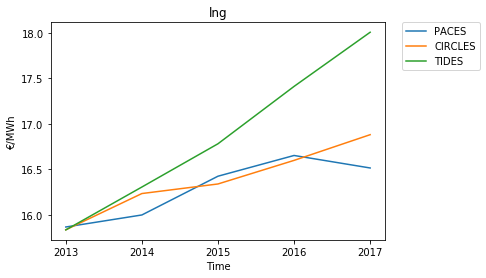

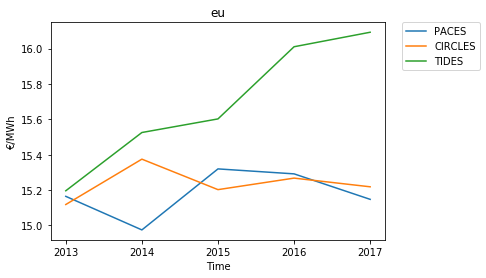

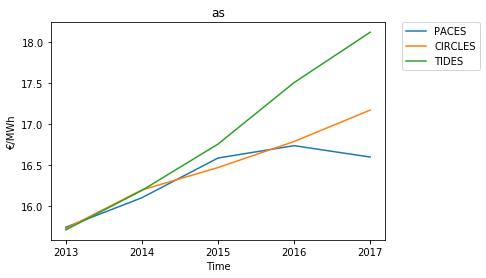

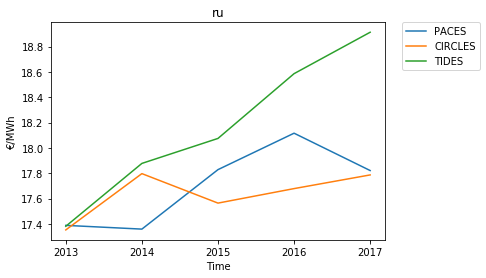

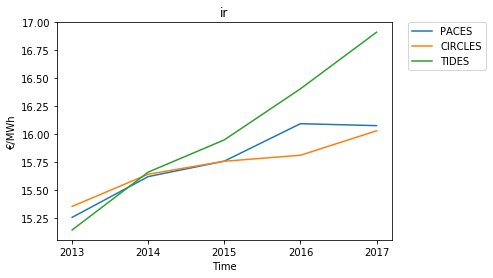

In [7]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df.index.name = 'month'
        run_df.rename(columns={1: 'price', 2: 'quantity'}, inplace=True)
        run_df = run_df['price'].resample('A').mean().plot(label=i, title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('€/MWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_price_Yearly_%s.png' %(market)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show();

## Quantity

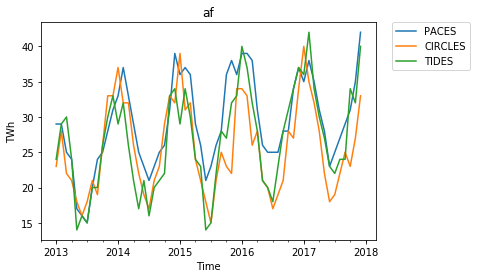

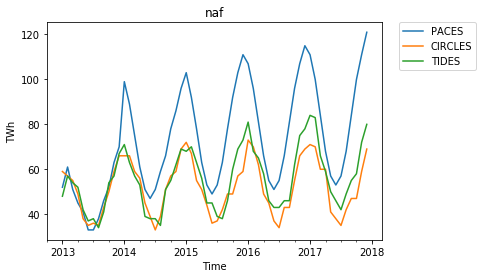

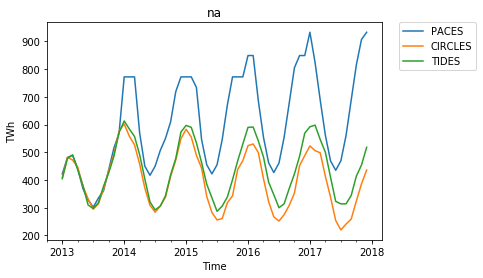

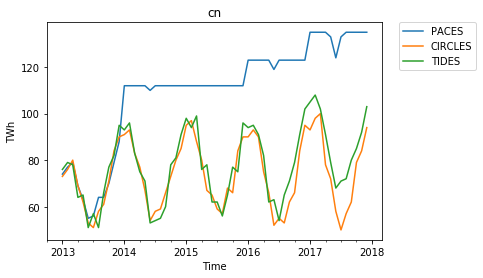

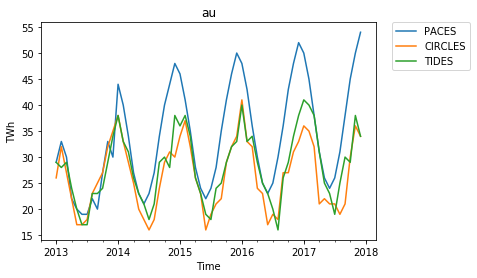

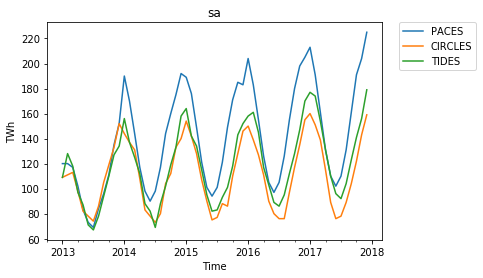

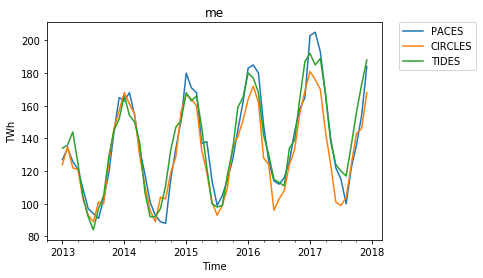

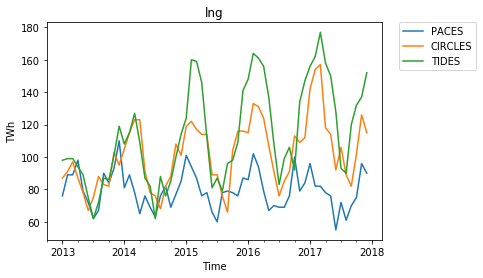

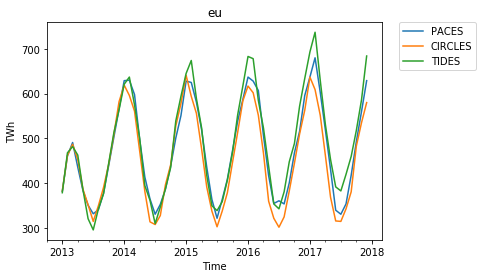

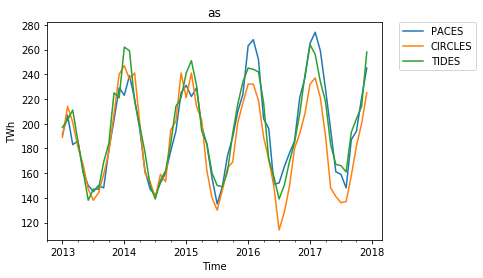

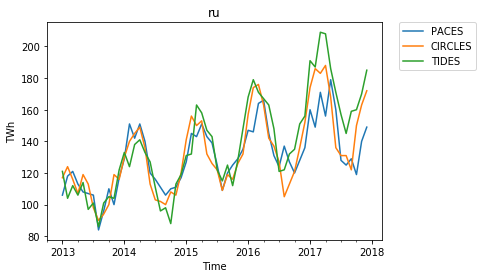

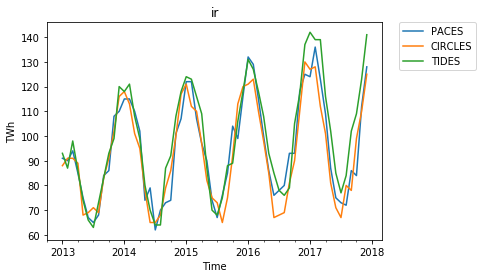

In [8]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df[2].plot(label=i, title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_quantity_Monthly_%s.png' %(market)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

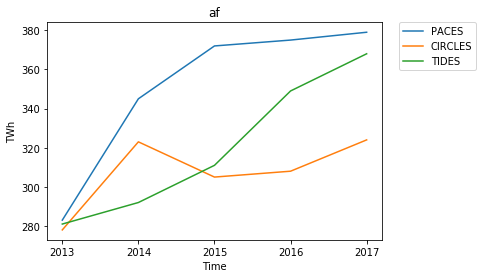

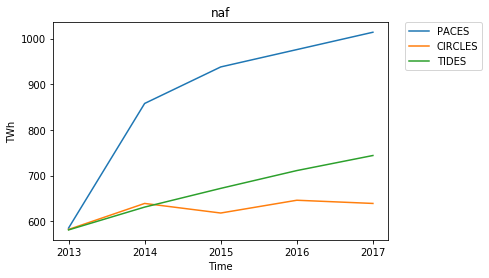

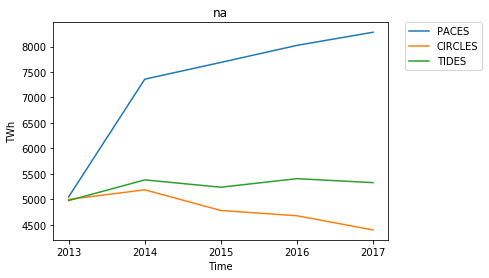

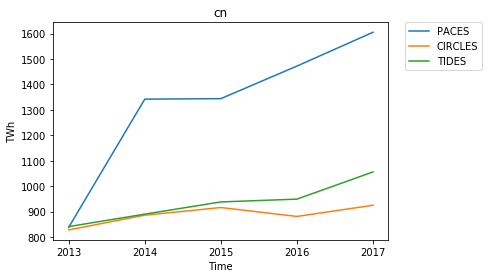

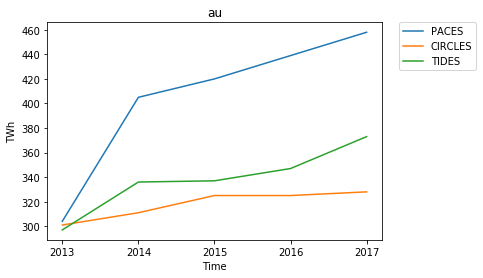

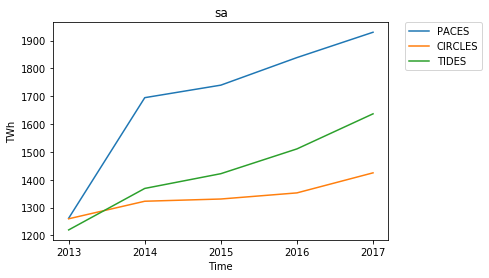

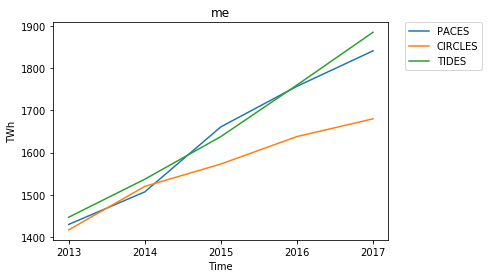

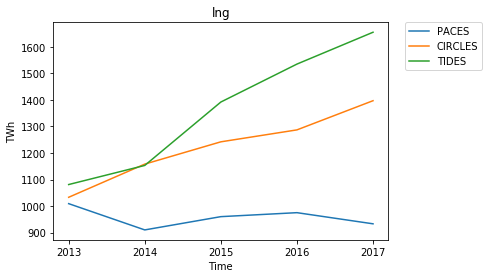

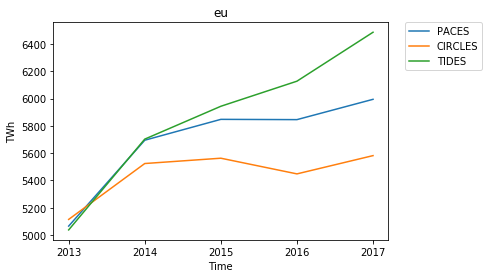

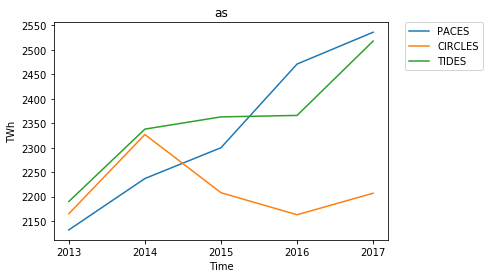

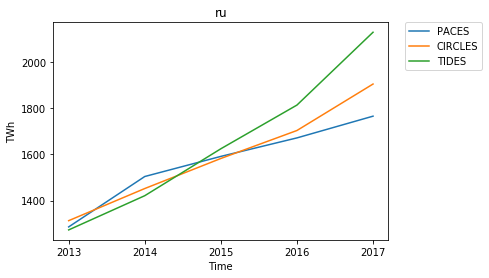

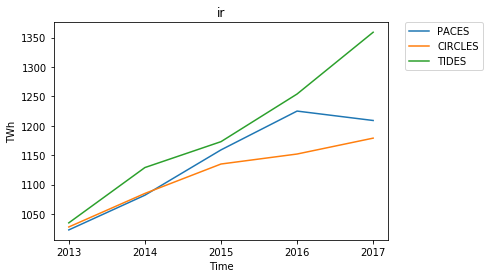

In [9]:
plt.subplots()
for market in init_market:
    for i in run_market:
        run_df = pd.DataFrame(run_market[i])
        run_df = run_df[run_df[3]==market]
        run_df.set_index(0, inplace=True)
        run_df.index = pd.to_datetime(run_df.index)
        run_df.index.name = 'month'
        run_df.rename(columns={1: 'price', 2: 'quantity'}, inplace=True)
        run_df = run_df['quantity'].resample('A').sum().plot(label='%s'%(i), title=market)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_quantity_Yearly_%s.png' %(market)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

## Let us focus on some agents
### buyers
What did they buy?


In [10]:
#for i in run_buyer: print(run_buyer[i])

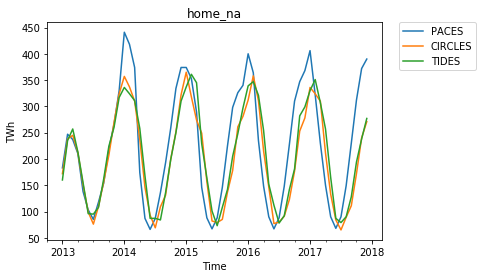

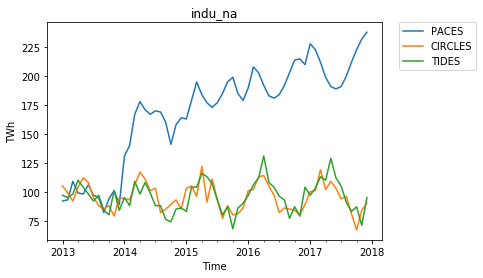

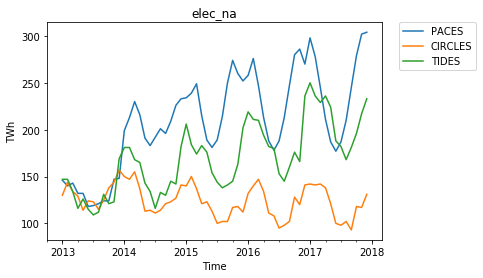

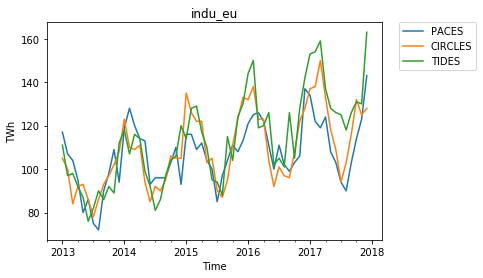

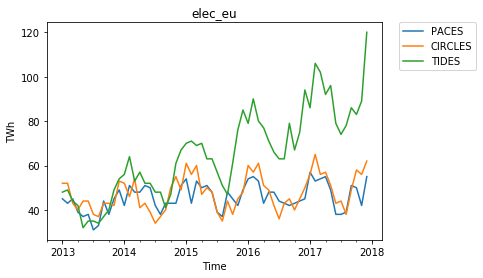

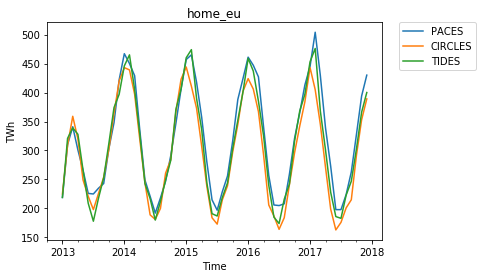

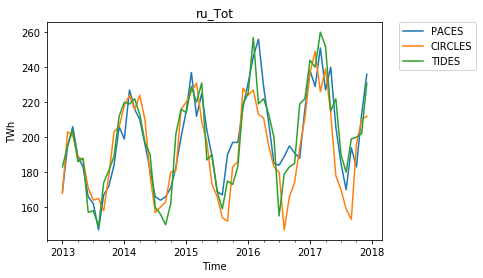

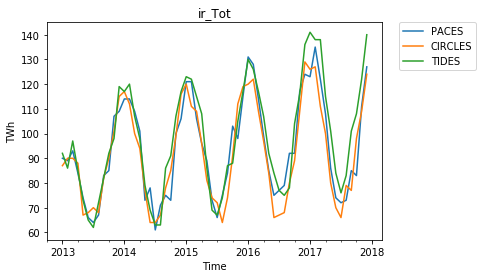

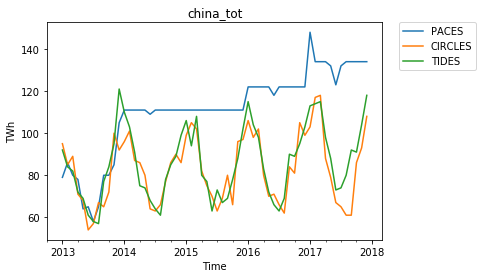

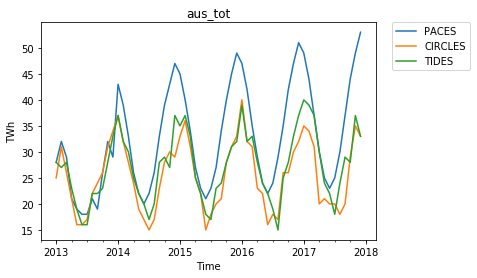

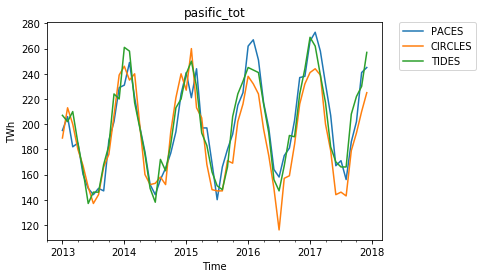

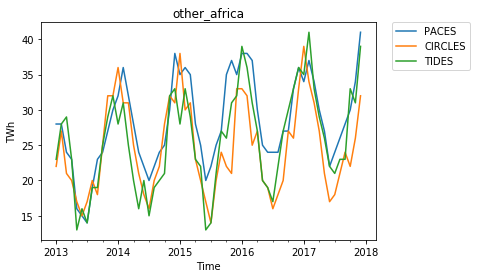

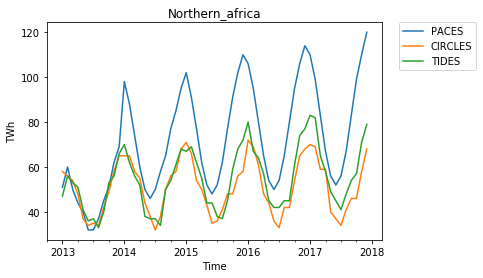

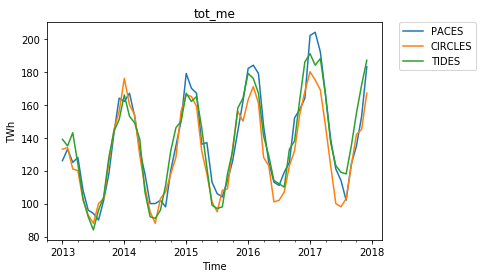

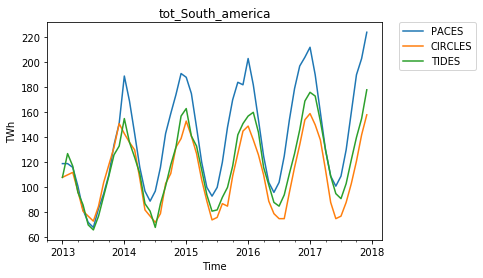

In [11]:
# What did buyers consume?
for buyer in init_buyer:
    for scen in run_buyer:
        df_buy = pd.DataFrame(run_buyer[scen])
        df_buy = df_buy[df_buy[3]==buyer]
        df_buy = df_buy.set_index(0)
        df_buy.index = pd.to_datetime(df_buy.index)
        df_buy[2].plot(label="%s" % (scen), title=buyer)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/buyer_quantity_Monthly_%s.png' %(buyer)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

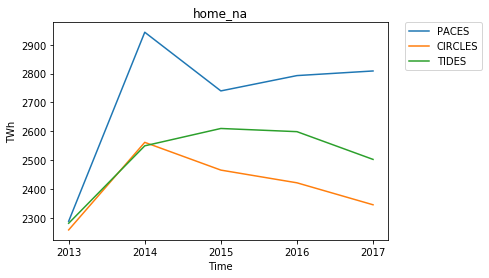

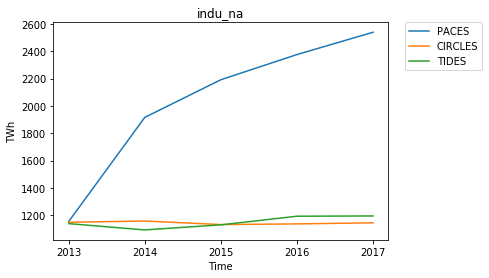

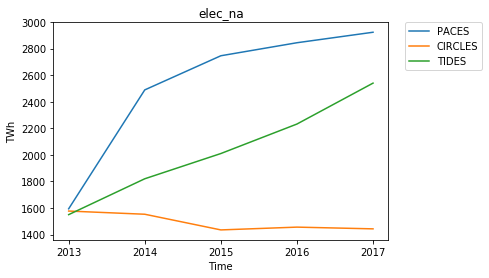

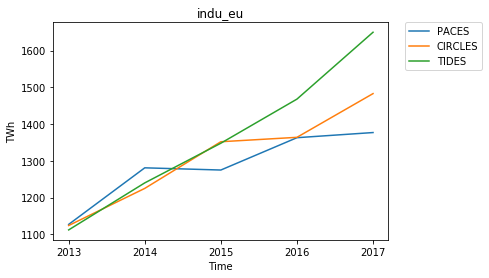

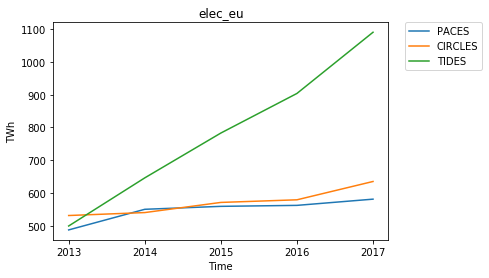

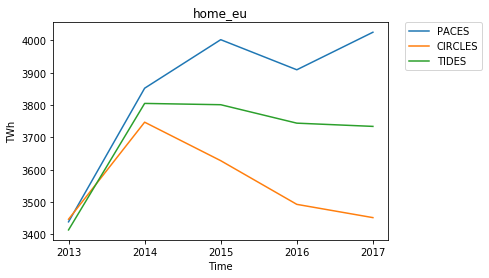

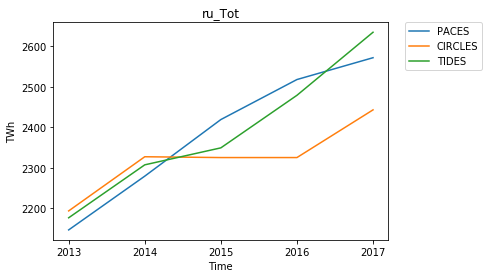

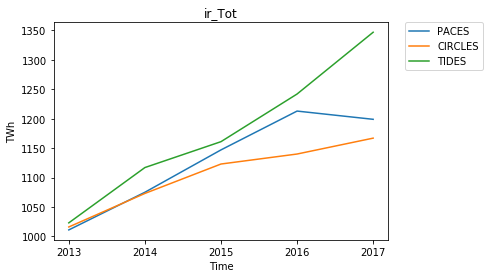

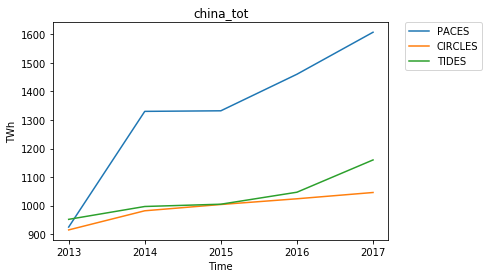

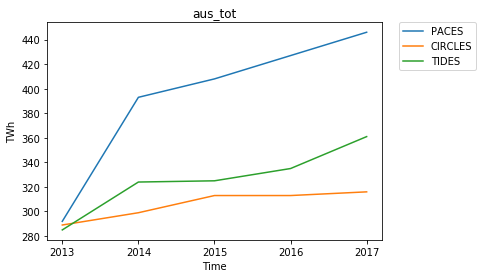

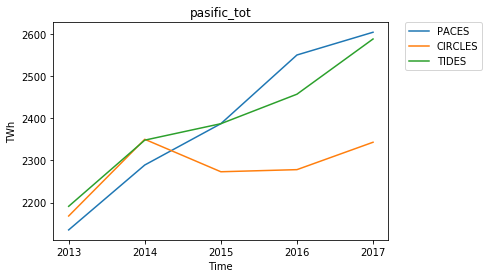

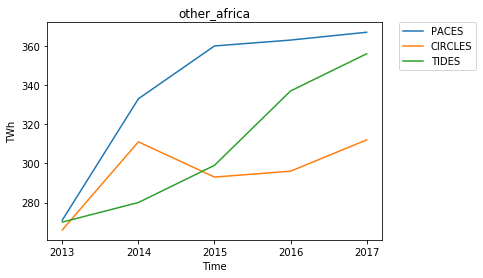

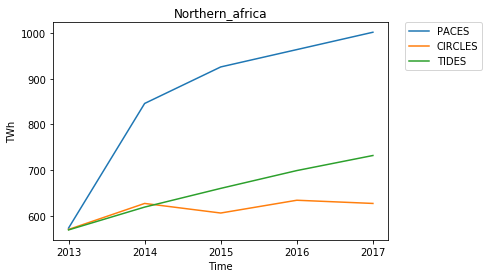

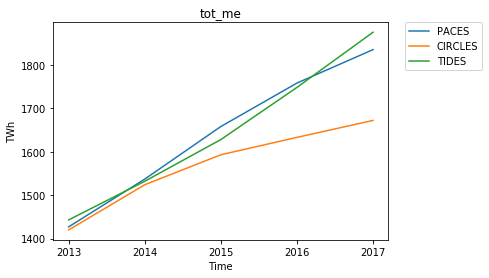

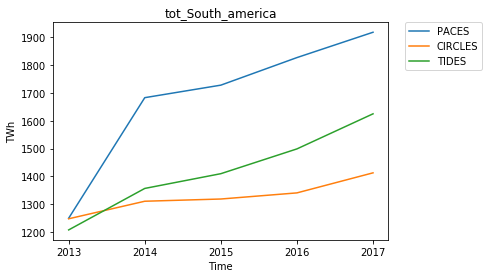

In [12]:
# What did buyers consume?
for buyer in init_buyer:
    for scen in run_buyer:
        df_buy = pd.DataFrame(run_buyer[scen])
        df_buy = df_buy[df_buy[3]==buyer]
        df_buy = df_buy.set_index(0)
        df_buy.index = pd.to_datetime(df_buy.index)
        df_buy[2].resample('A').sum().plot(label="%s" % (scen), title=buyer)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/buyer_quantity_Yearly_%s.png' %(buyer)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

### sellers
What did they sell?

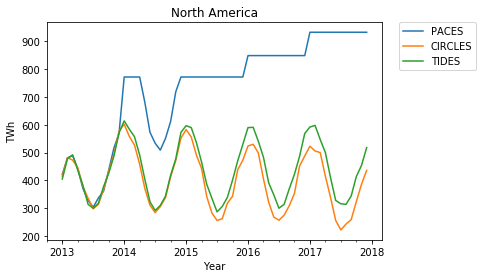

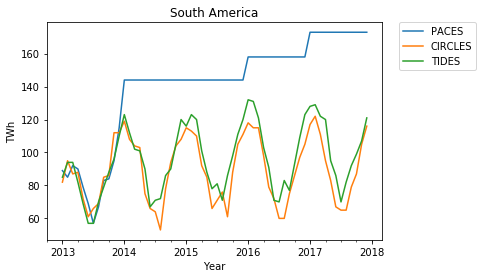

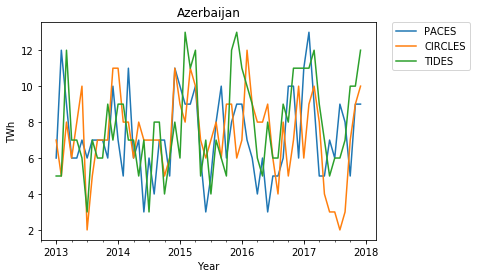

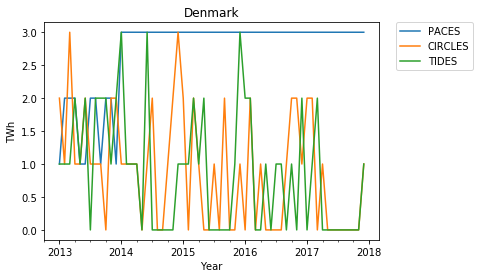

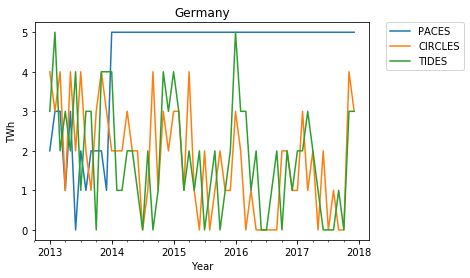

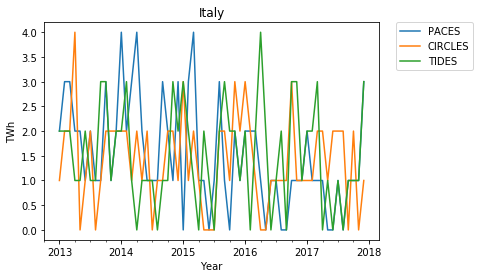

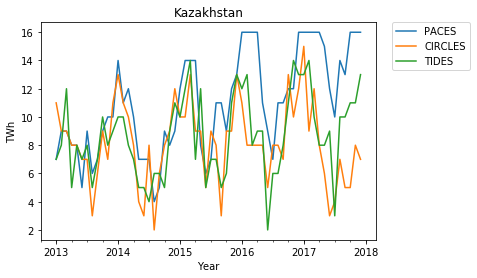

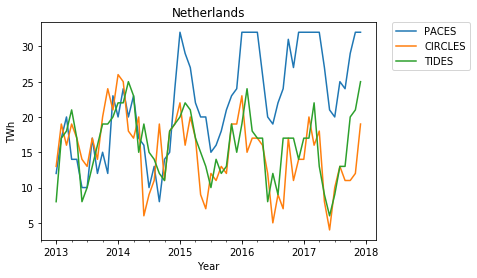

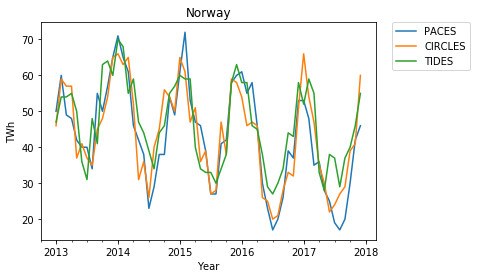

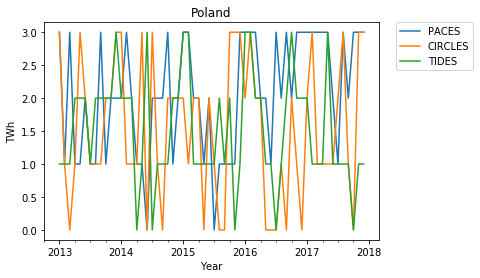

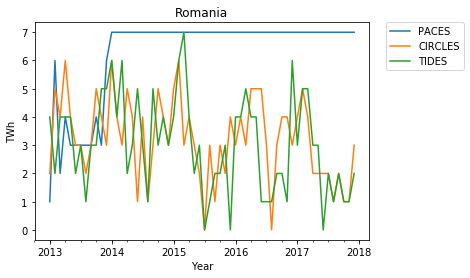

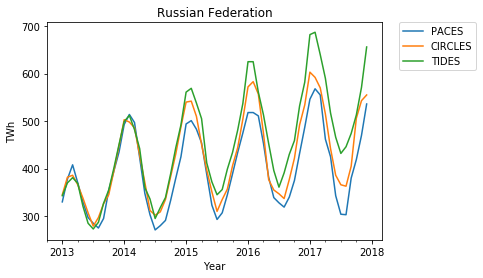

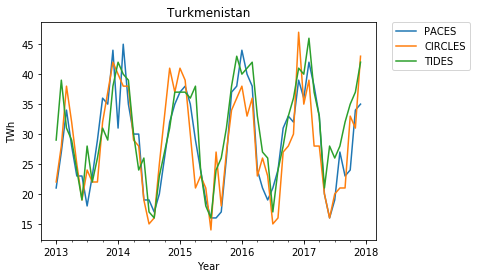

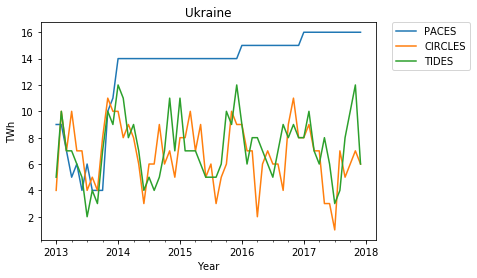

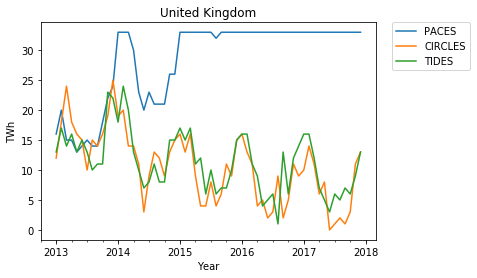

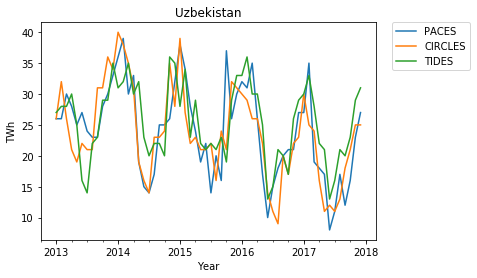

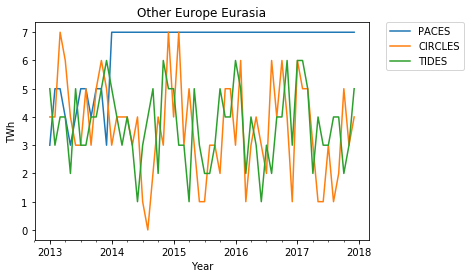

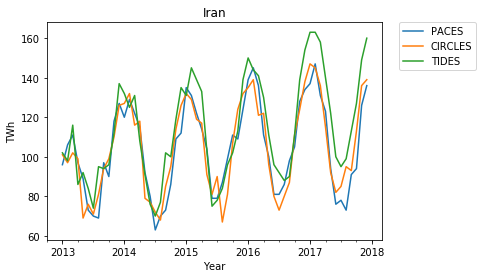

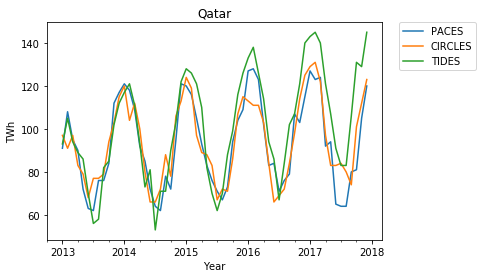

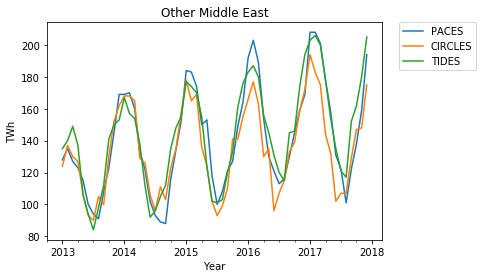

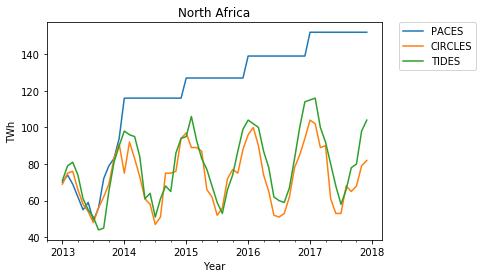

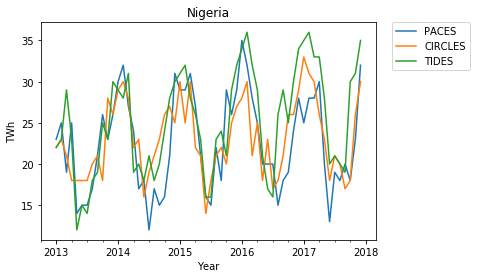

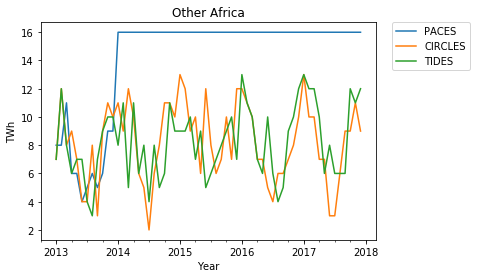

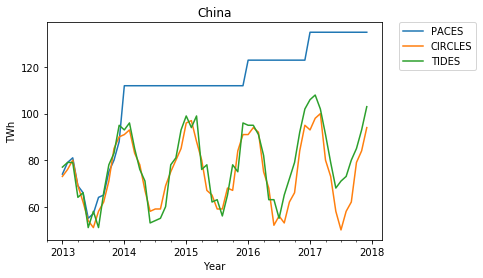

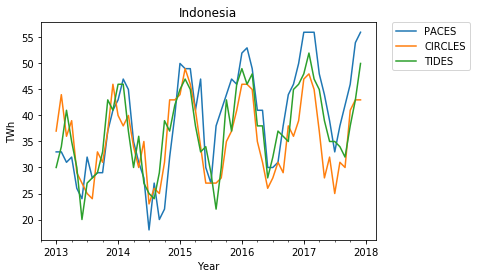

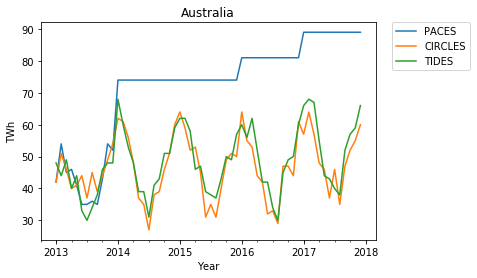

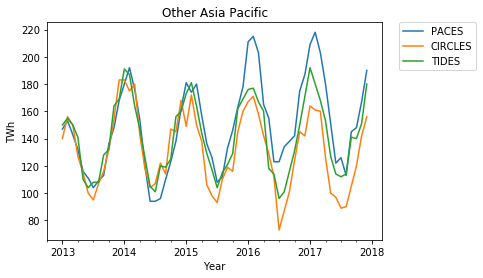

In [13]:
# What did sellers sell?
for seller in init_seller:
    for scen in run_seller:
        df_seller = pd.DataFrame(run_seller[scen])
        df_seller = df_seller[df_seller[3]==seller]
        df_seller = df_seller.set_index(0)
        df_seller.index = pd.to_datetime(df_seller.index)
        df_seller[2].plot(label="%s" % (scen), title=seller)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/seller_quantity_Monthly_%s.png' %(seller)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

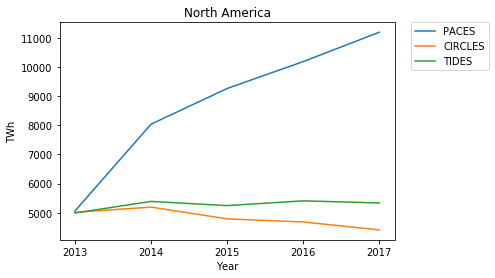

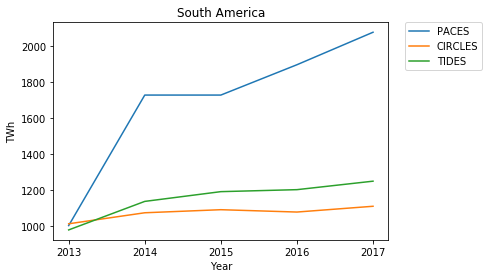

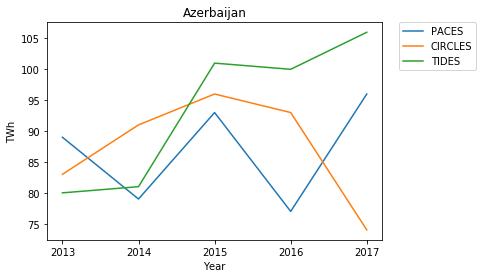

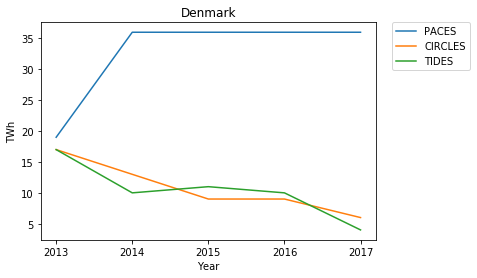

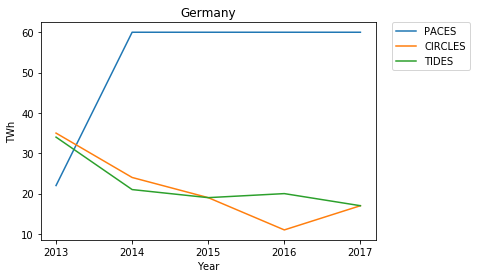

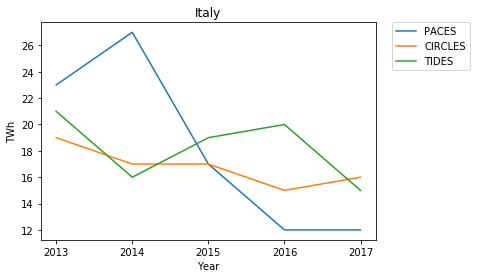

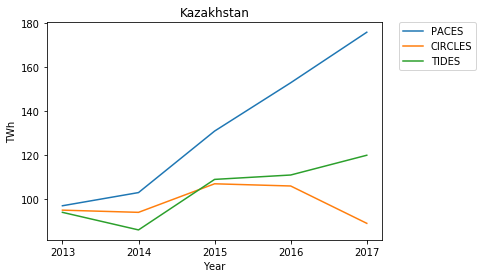

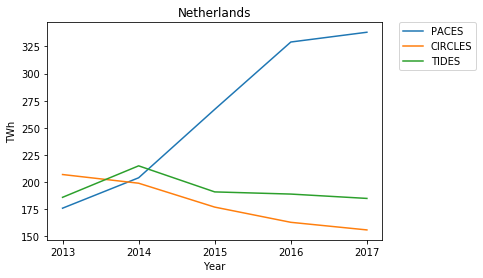

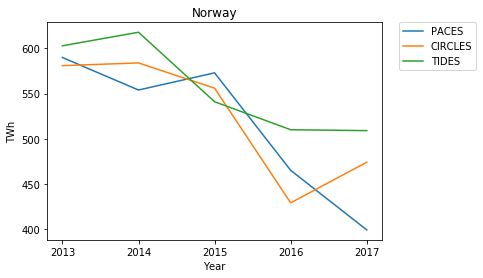

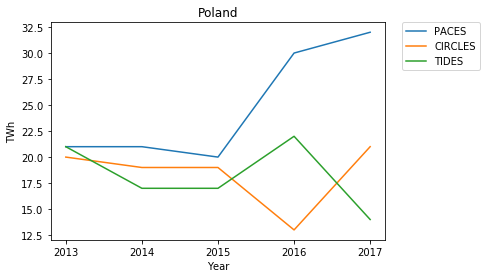

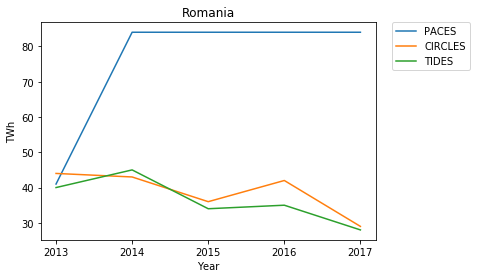

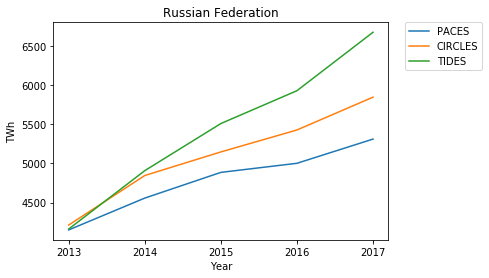

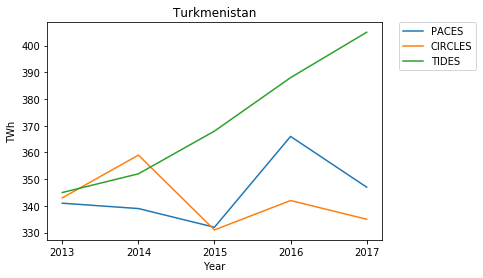

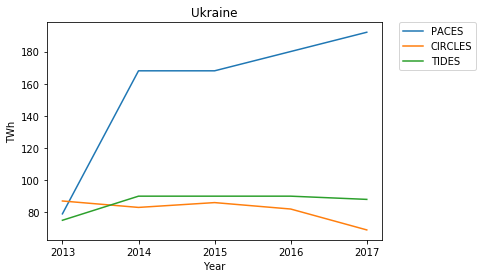

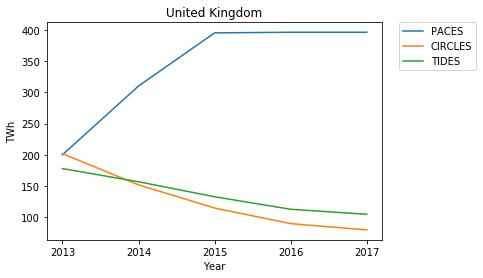

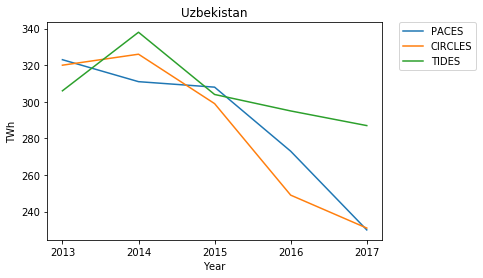

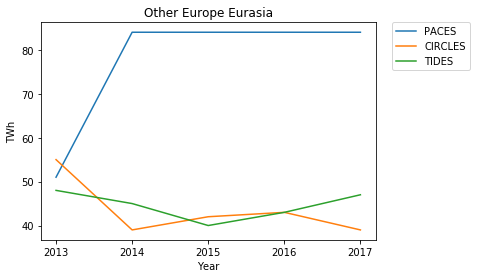

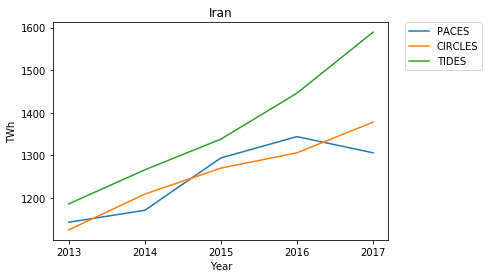

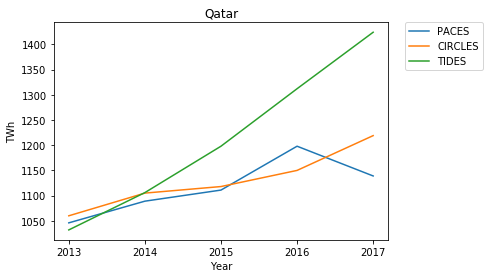

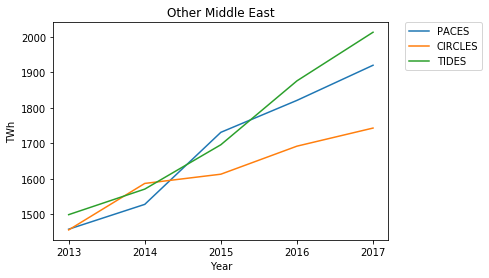

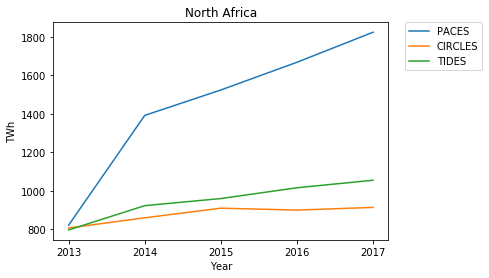

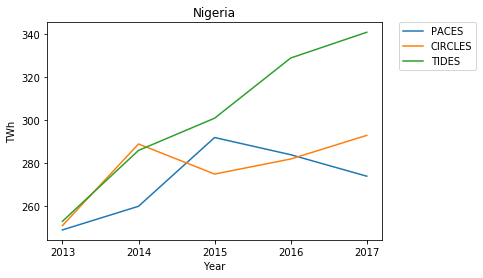

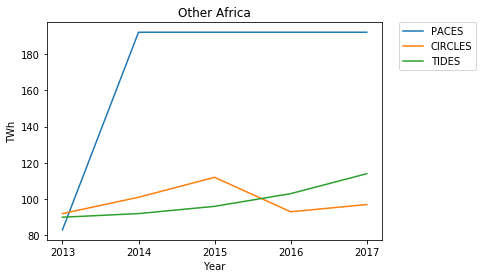

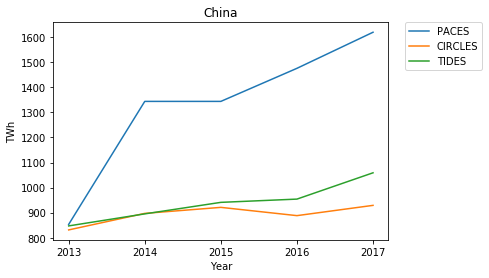

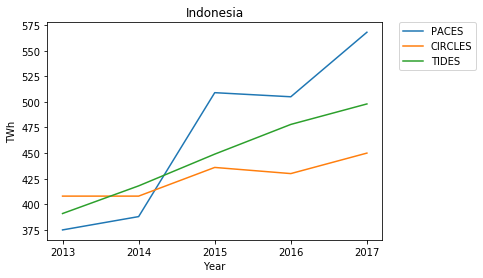

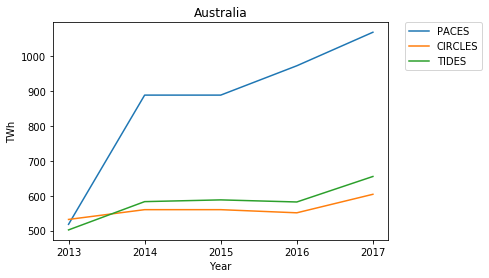

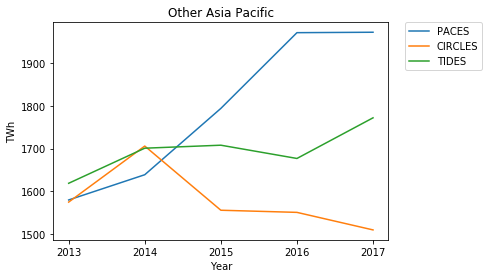

In [14]:
# What did sellers sell?
for seller in init_seller:
    for scen in run_seller:
        df_seller = pd.DataFrame(run_seller[scen])
        df_seller = df_seller[df_seller[3]==seller]
        df_seller = df_seller.set_index(0)
        df_seller.index = pd.to_datetime(df_seller.index)
        df_seller[2].resample('A').sum().plot(label="%s" % (scen), title=seller)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/seller_quantity_Yearly_%s.png' %(seller)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

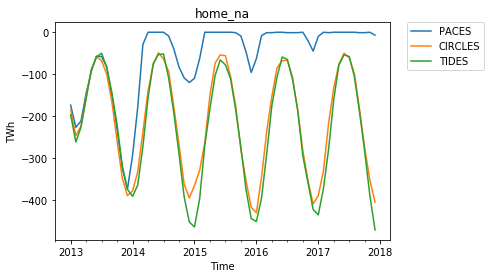

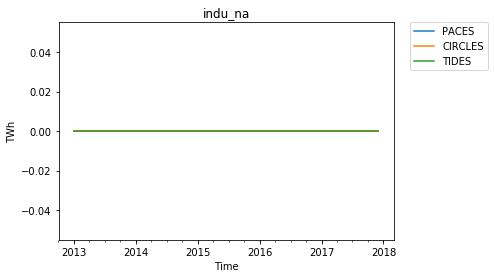

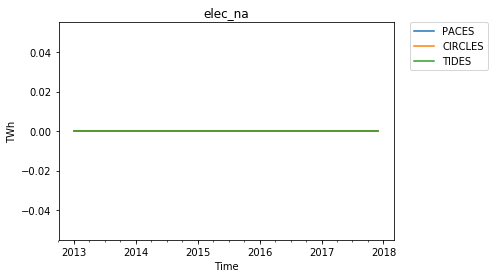

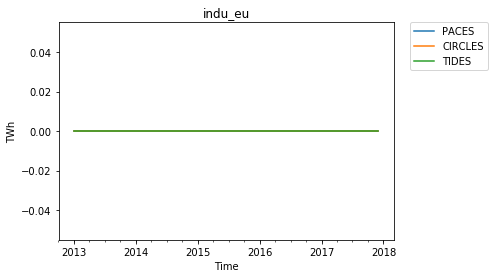

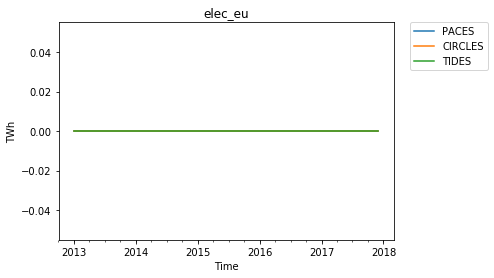

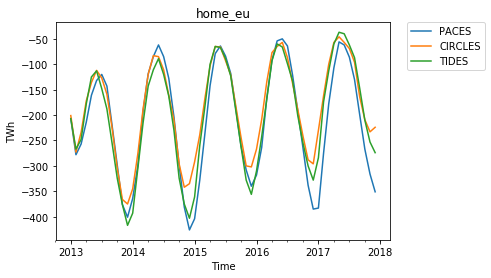

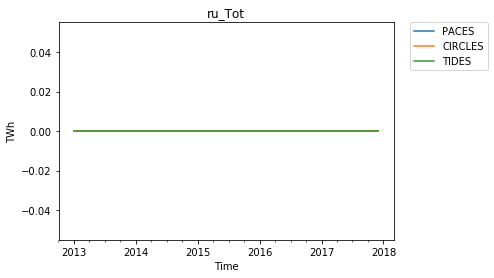

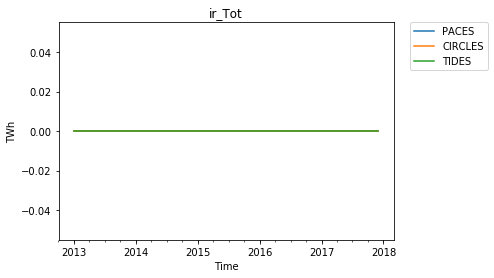

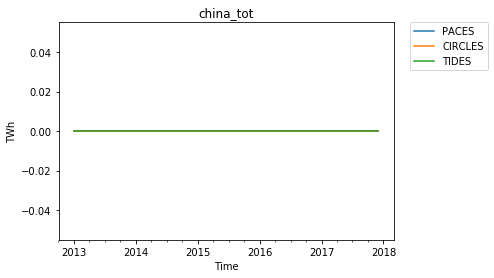

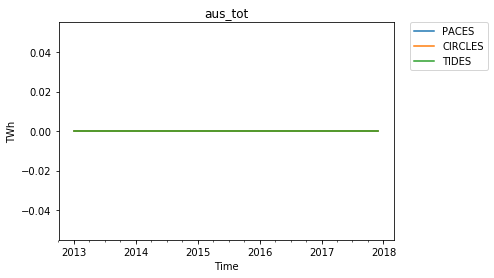

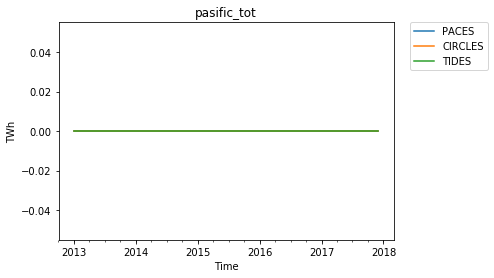

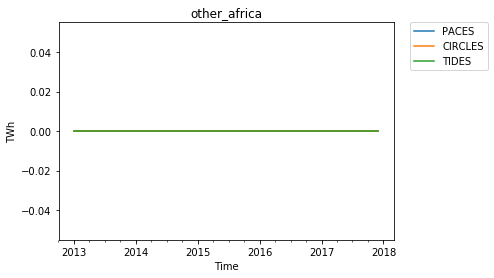

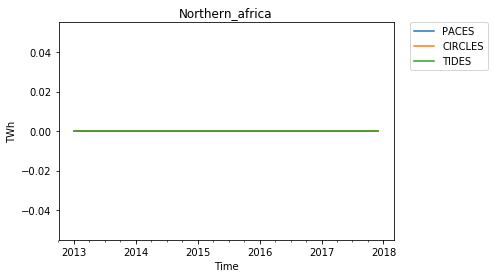

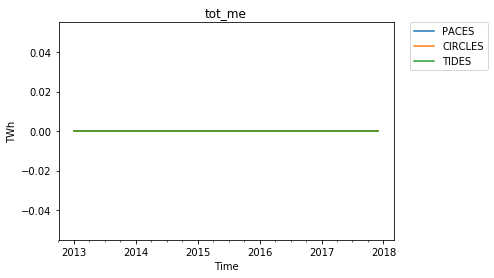

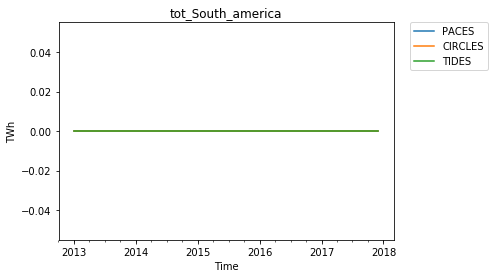

In [15]:
# What did buyers do with their storage space?
for buyer in init_buyer:
    for scen in run_buyer:
        df_buy = pd.DataFrame(run_buyer[scen])
        df_buy = df_buy[df_buy[3]==buyer]
        df_buy = df_buy.set_index(0)
        df_buy.index = pd.to_datetime(df_buy.index)
        df_buy[1].plot(label="%s" % (scen), title=buyer)
        #df_buy[2].resample('A').sum().plot(label="%s" % (scen),rot=45, title=buyer)
    plt.legend()
    plt.ylabel('TWh')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save_figures:
        filepath = 'plots/buyer_quantity_Storage_%s.png' %(buyer)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

# origin data

In [16]:
# Some handy commands, from the top

#saving plots
save_figures=False
# Reading data back
#df_pickle = pd.read_pickle('marketdataorigin.pickle', compression='infer')

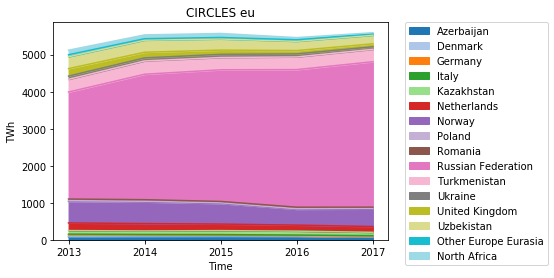

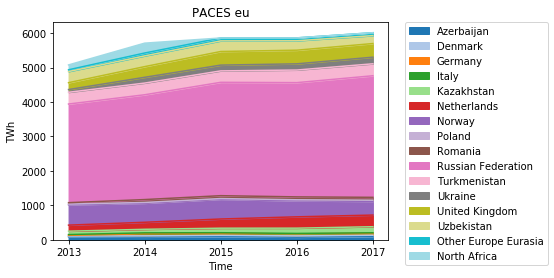

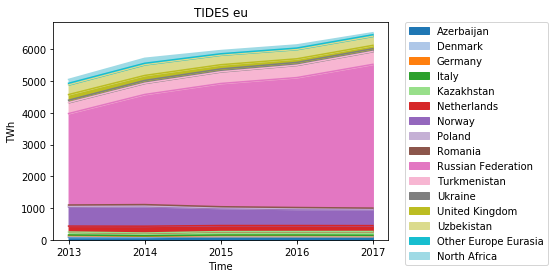

In [17]:
# plot the EU supply
# levels[0] are the scenarios
# fix repeating colors: tab20 has 20 unique colors

for scen in df_pickle.columns.levels[0]:
    market='eu'
    df = df_pickle[scen][market]['seller_analytics']
    df.index = pd.to_datetime(df.index)
    df.resample('A').sum().plot.area(title='%s %s'%(scen,market), colormap="tab20")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_seller_quantity_%s_%s.png' %(market,scen)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

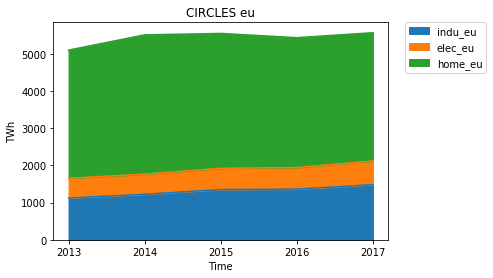

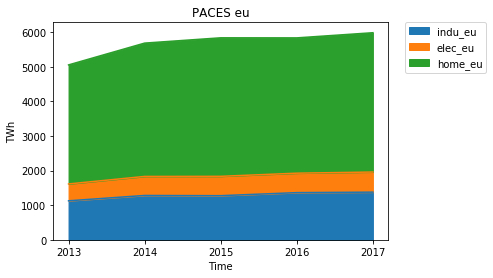

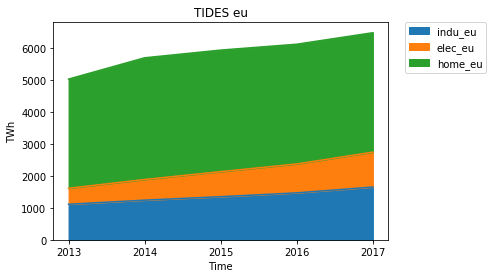

In [18]:
# plot the EU supply
# levels[0] are the scenarios
for scen in df_pickle.columns.levels[0]:
    market='eu'
    df = df_pickle[scen][market]['buyer_analytics']
    df.index = pd.to_datetime(df.index)
    df.resample('A').sum().plot.area(title='%s %s'%(scen,market))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_buyer_quantity_%s_%s.png' %(market,scen)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

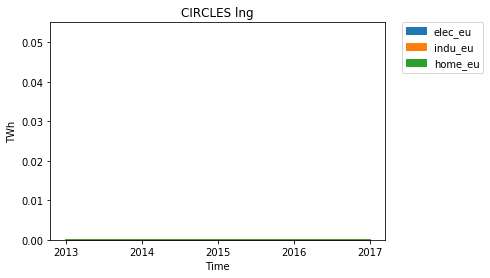

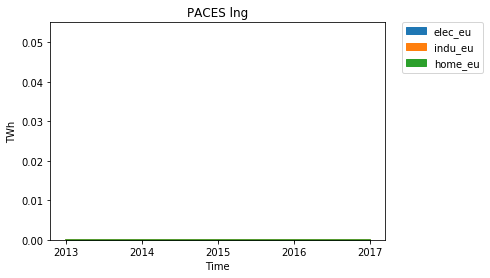

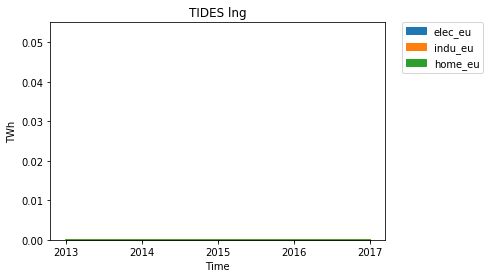

In [19]:
# plot the EU supply
# levels[0] are the scenarios
for scen in df_pickle.columns.levels[0]:
    market='lng'
    df = df_pickle[scen][market]['buyer_analytics'][['elec_eu','indu_eu','home_eu']]
    df.index = pd.to_datetime(df.index)
    df.resample('A').sum().plot.area(title='%s %s'%(scen,market))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_buyer_quantity_%s_%s_%s.png' %(market,scen,'eu')
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

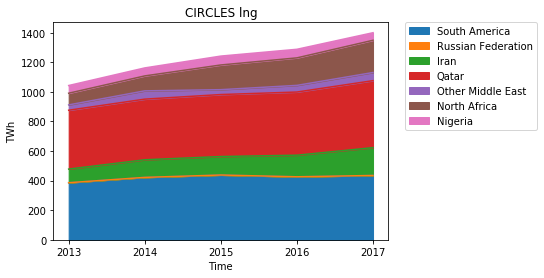

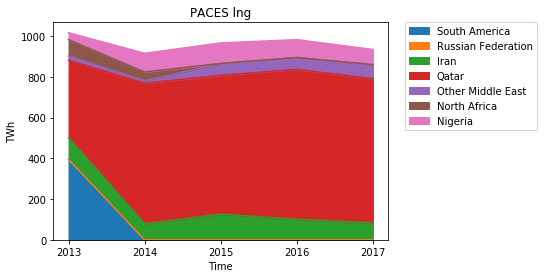

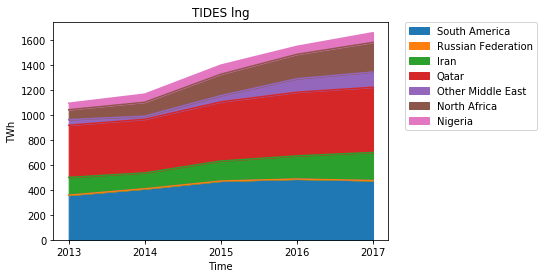

In [20]:
for scen in df_pickle.columns.levels[0]:
    market='lng'
    df = df_pickle[scen][market]['seller_analytics']
    df.index = pd.to_datetime(df.index)
    df.resample('A').sum().plot.area(title='%s %s'%(scen,market))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_seller_quantity_%s_%s.png' %(market,scen)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

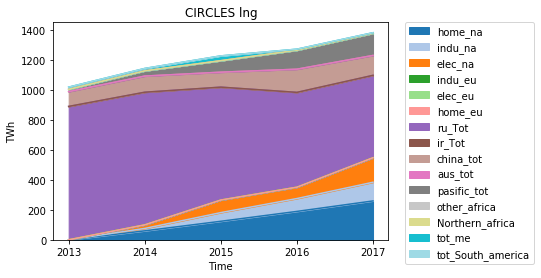

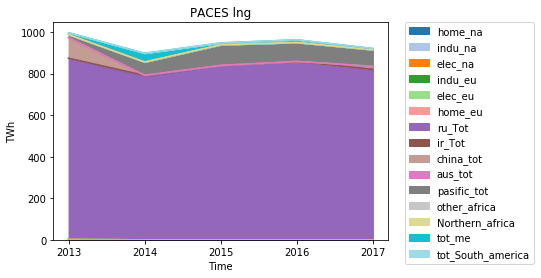

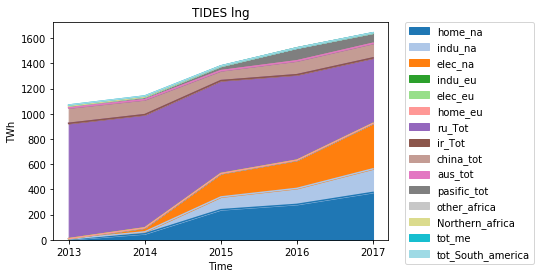

In [21]:
for scen in df_pickle.columns.levels[0]:
    market='lng'
    df = df_pickle[scen][market]['buyer_analytics']
    df.index = pd.to_datetime(df.index)
    df.resample('A').sum().plot.area(title='%s %s'%(scen,market), colormap="tab20")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('TWh')
    plt.xlabel('Time')
    if save_figures:
        filepath = 'plots/market_buyer_quantity_%s_%s.png' %(market,scen)
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

In [22]:
#trying to construct a subplot since that will enhance presentation capabilities

#fig =plt.figure()

#ax1 = fig.add_subplot(221)
#df1 = df_pickle['CIRCLES']['lng']['buyer_analytics'][['elec_eu','indu_eu','home_eu']]
#df1.index = pd.to_datetime(df1.index)
#ax1 = df1.resample('A').sum().plot(title='%s %s'%('CIRCLES','LNG'),axes=ax[0,0])

#ax2 = fig.add_subplot(222)
#df2 = df_pickle['TIDES']['lng']['buyer_analytics'][['elec_eu','indu_eu','home_eu']]
#df2.index = pd.to_datetime(df2.index)
#ax2 = df2.resample('A').sum().plot(title='%s %s'%('TIDES','LNG'),axes=ax[0,1])

#plt.show()